# ch4. pearson correlation

피어슨 상관계수는 두 변수 간의 선형적인 상관관계를 측정하는 지표입니다. 이를 이용하면 한 변수가 증가하거나 감소할 때, 다른 변수가 어떻게 변화하는지를 확인할 수 있습니다.

## 모집단과 표본
모집단(population): 관심이 되는 대상 전체 (전체 유권자들의 투표 성향)  
표본(sample): 모집단의 특성을 알기 위해 추출한 일부 (전화로 여론조사를 한 1000명의 투표 성향)  
모집단의 특성을 알기 위해서 모든 사람들을 다 조사할 수 없으니, 표본을 추출하여 조사한다. 모집단이 특정한 분포를 이루고 있다고 가정하고, 표본을 통해 추출한 정보로 모집단의 특징을 추측하는 것을 모수 통계라고 부릅니다.

## 평균과 분산
### 평균
자료의 합을 자료의 개수로 나눠준 값. 모집단의 평균인지, 표본 집단의 평균인지에 따라서 표기 방법만 살짝 다르다. 헷갈린다면 표본 평균, 표본 분산 정도만 이해하고 넘어가도 무방하다.

모평균: 그리스어로 M을 나타내는 μ(뮤) 문자를 사용. N은 모집단의 수  

$$\mu=\frac{\sum_{i=1}^{n}{x_{i}}}{N}$$

표본 평균: X위에 바를 그린 기호로 표현. n은 표본의 크기

$$\bar{X}=\frac{\sum_{i=1}^{n}{x_{i}}}{n}$$

예시)

| 광고비 | 5 | 6 | 7 | 8 | 9 | 11 | 12 | 13 | 14 | 15 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 매출액 | 16 | 19 | 18 | 20 | 24 | 26 | 30 | 32 | 31 | 34 |

In [1]:
import numpy as np

In [2]:
marketing_cost = np.array([5, 6, 7, 8, 9, 11, 12, 13, 14, 15])
sales = np.array([16, 19, 18, 20, 24, 26, 30, 32, 31, 34])

### 분산, 표준편차
자료가 평균을 기준으로 얼만큼 퍼져있는지를 측정한 값. 모든 자료들이 평균으로부터 얼만큼 떨어졌는지 거리를 제곱한 것을 평균낸 것이 분산. 분산을 제곱근 한 것이 표준 편차. 

모분산: 모표준편차의 제곱으로 표현됨. 각 자료 값들에서 모평균을 빼준 값의 제곱합을 다시 평균낸 값.

$$\sigma^2=\frac{\sum_{i=1}^{N}({x_{i}-\mu)^2}}{N}$$

모표준편차: 그리스어 문자료 s를 나타내는 σ를 기호로 사용. 모분산의 제곱근

$$\sigma=\sqrt{\sigma^2}$$

표본 분산: 표본 표준편차의 제곱으로 표현. 표본의 수 n이 아닌, n-1로 나눠주는데 이는 통계학에서 부르는 자유도(degree of freedom)이라는 개념이다. 완벽히 이해하려면 매우 복잡한 개념으로 일단은 암기하고, 직관적으로는 각 표본들에서 표본 평균을 한번씩 빼준걸 개수에 반영시켜 준다는 의미로 받아들이면 된다.
$$s^2=\frac{\sum_{i=1}^{n}({x_{i}-\bar{x})^2}}{n-1}$$

표본 표준 편차: s로 표현
$$s=\sqrt{s^2}$$

## 공분산과 상관계수
공분산은 한 확률 변수의 증감에 따른 다른 확률 변수의 증감의 경향에 대한 측도입니다. 이를 통해서 확률 변수들 간에 선형적인 상관관계를 알 수 있습니다. 공분산이 양수이면 한쪽이 증가하면 다른 한쪽도 증가하고, 음수이면 한쪽이 증가하면 다른 한 쪽은 감소합니다.

**모집단 공분산**

$$\sigma_{xy}=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$$

**표본집단 공분산**

$$S_{xy}=\frac{1}{n-1}\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})$$

| 광고비 | 매출액 | 광고비 - 평균 광고비 | 매출액 - 평균 매출액 | (광고비 - 평균 광고비)*(매출액 - 평균 매출액) |
| --- | --- | --- | --- | --- |
| 5 | 16 | -5 | -9 | 45 |
| 6 | 19 | -4 | -6 | 24 |
| 7 | 18 | -3 | -7 | 21 |
| 8 | 20 | -2 | -5 | 10 |
| 9 | 24 | -1 | -1 | 1 |
| 11 | 26 | 1 | 1 | 1 |
| 12 | 30 | 2 | 5 | 10 |
| 13 | 32 | 3 | 7 | 21 |
| 14 | 31 | 4 | 6 | 24 |
| 15 | 34 | 5 | 9 | 45 |
| 100 | 250 | 0 | 0 | 202 |

$$S_{xy}=\frac{202}{10-1}=22.44(억원)$$

### 피어슨 상관 계수
두 숫자형 변수 사이 선형적 강도를 나타내기 위해 공분산을 각 변수의 표준 편차로 나눈 피어슨 상관계수를 사용한다.

모집단의 피어슨 상관계수

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}$$

표본집단의 피어슨 상관계수

$$r_{xy}=\frac{S_{xy}}{S_{x}S_{y}}$$

피어슨 상관계수를 통해서 알아본 마케팅 비용과 매출간의 상관관계는 0.86이다. 이는 마케팅 비가 증가하면 매출이 증가하는 뚜렷한 양의 선형적 상관관계가 있다고 볼 수 있다. 피어슨 상관계수에 따라서 자료의 분포 형태는 아래와 같은 모습을 보인다.

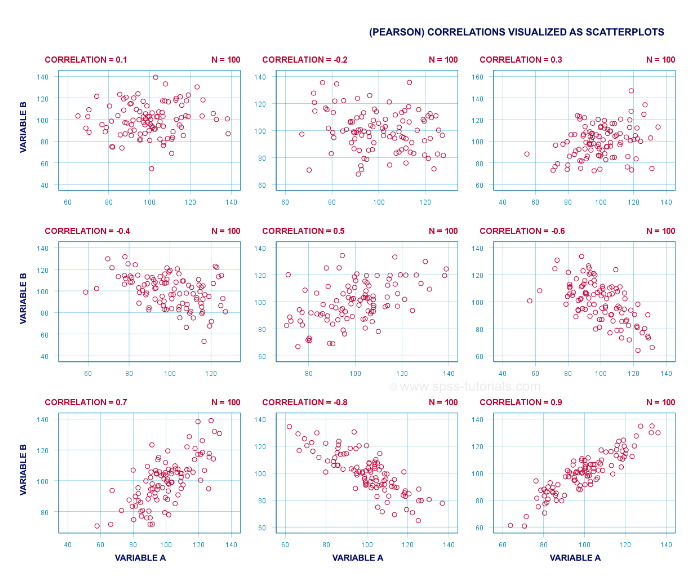

In [11]:
from matplotlib import pyplot as plt

마케팅 비용과 매출액도 실제로 오른쪽 아래 그림과 비슷한 분포를 보이는지 산포도를 그려보겠습니다.

## pandas corr을 이용한 pearson coefficient 계산

이제 피어슨 상관계수가 무엇인지 알았으니, 우리가 전처리한 데이터 셋을 가지고 계산해보겠습니다. pandas dataframe의 corr 함수를 이용하면 모든 컬럼 쌍 간의 피어슨 상관계수를 계산해줍니다.

## 피쳐 간의 상관관계 분석하기
pandas dataframe의 corr 함수를 이용하면 각 컬럼 간의 상관관계를 분석해줍니다. dataframe의 corr 함수는 기본적으로 모든 컬럼 쌍 간의 person 상관계수를 계산합니다.

원래는 범주형 데이터와 숫자형 데이터 사이의 피어슨 상관계수는 구할 수 없지만, 우리가 미리 one-hot encoding을 해주어 계산을 할 수 있습니다. 만일 one-hot encoding을 거치지 않고 바로 범주형 변수와 연속형 변수 사이의 상관관계를 계산하고 싶다면 다른 기법들도 있습니다만, 복잡하므로 생략하겠습니다. (simple is the best!)

matplotlib과 seaborn을 사용하면 쉽게 시각화를 할 수 있습니다. 

붉은 색으로 표시된 부분은 양의 상관관계로 한 변수가 증가하면 다른 변수도 증가하는 것을 말합니다. 파란색으로 표시된 부분은 음의 상관관계로 하나가 증가하면 다른 하나는 감소하는 상관관계를 말합니다. 1이나 -1에 가까울 수록 강한 상관관계이고, 0에 가까울 수록 상관관계가 없습니다.

Survived 컬럼과 0.2 이상의 양의 상관관계를 갖는 컬럼은 Fare, Pclass_1이 있습니다. 이 말은 즉, 돈을 많이 지불할 수록, 1등석 승객일 수록 생존할 가능성이 높다는 것을 의미합니다. 다음으로 Survived 컬럼과 0.2 이상의 음의 상관관계를 갖는 컬럼은 is_male, IsAlone, Pclass 컬럼이 있습니다. 해석을 해보자면 여성일 수록 (is_male=0), 혼자 탈 수록 (IsAlone=0), 1등석에 탈수록 (Pclass_3=0) 생존율이 높다는 의미입니다. 흥미롭게도 Parch, SibSp 컬럼은 상관관계가 낮게 잡히는데 파생 변수로 추가한 IsAlone이 높은 상관관계를 보여줍니다.

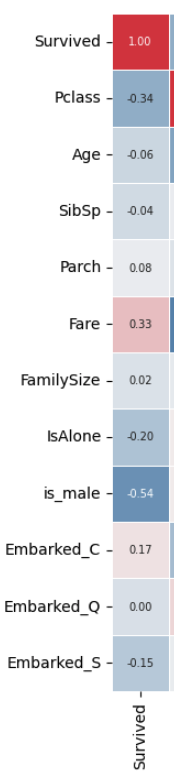

생존 여부와 관련 없는 다른 데이터들 간의 상관관계도 확인할 수 있습니다. 먼저 Pclass 컬럼은 Embarked_C와는 음의 상관관계, Embarked_Q와는 양의 상관관계를 갖습니다. 즉, C에서 탑승한 사람들은 주로 1등석에, Q에서 탑승한 승객들은 3등석에 탔다는걸 추론할 수 있습니다. 다음으로 Fare도 Embarked_C와 양의 상관관계에 있습니다. 즉, C에서 탄 사람들이 돈을 더 많이 지불하고 1등칸에 탔다는걸 알 수 있습니다.

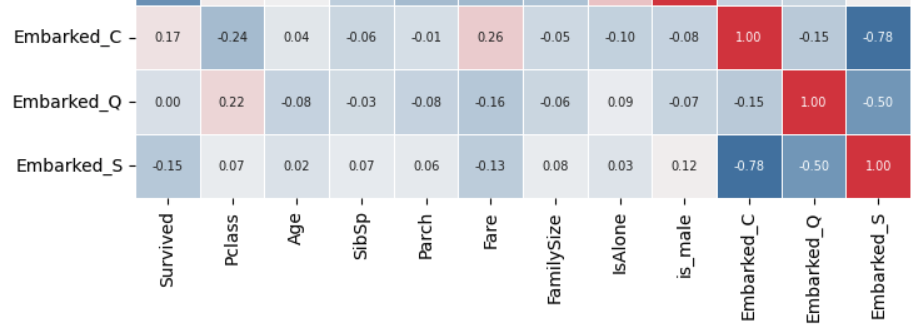

## 연습문제
상관관계 시각화 행렬을 보고, 앞서 언급되진 않았지만 흥미로운 상관관계들을 찾아보세요.